In [69]:
from IPython.display import Image as DisplayImage
from PIL import Image
import numpy as np

In [106]:
img1=Image.open("../input/flower/Dahlia.png")
img=Image.open("../input/flower/Rose.png")
#Average Method
def imgtogry(img,start=(0,0),end=None):
    rgba=np.array(img)
    height,width,channel=rgba.shape
    if end!=None:
        height,width=end[0]+1,end[1]+1
    for i in range(start[0],height):
        for j in range(start[1],width):
            gryval=sum(rgba[i][j][0:3])/3
            for k in range(channel):
                rgba[i][j][k]=gryval
    return Image.fromarray(rgba)
#Weighted Method 
def imgtogry2(img,start=(0,0),end=None):
    rgba=np.array(img)
    height,width,channel=rgba.shape
    if end!=None:
        height,width=end[0]+1,end[1]+1
    for i in range(start[0],height):
        for j in range(start[1],width):
            gryval=((0.3*rgba[i][j][0])+(0.59*rgba[i][j][1])+(0.11*rgba[i][j][2]))
            for k in range(channel):
                rgba[i][j][k]=gryval
    return Image.fromarray(rgba)
#Negative Image
def imgtoneg(img,start=(0,0),end=None):
    rgba=np.array(img)
    height,width,channel=rgba.shape
    if end!=None:
        height,width=end[0]+1,end[1]+1
    for i in range(start[0],height):
        for j in range(start[1],width):
            for k in range(channel):
                rgba[i][j][k]=255-rgba[i][j][k]
    return Image.fromarray(rgba)
#Brightening Image
def brtimg(img,perinc=10,start=(0,0),end=None):
    rgba=np.array(img)
    height,width,channel=rgba.shape
    if end!=None:
        height,width=end[0]+1,end[1]+1
    for i in range(start[0],height):
        for j in range(start[1],width):
            if channel<3:
                brightness=(perinc*rgba[i][j][0])/100
            else:
                brightness=(perinc*(sum(rgba[i][j][0:3])/3))/100
            for k in range(channel):
                if rgba[i][j][k]+brightness<=255:
                    rgba[i][j][k]+=brightness
                else:
                    rgba[i][j][k]=255
    return Image.fromarray(rgba)
#Darkening Image
def drkimg(img,perinc=10,start=(0,0),end=None):
    rgba=np.array(img)
    height,width,channel=rgba.shape
    if end!=None:
        height,width=end[0]+1,end[1]+1
    for i in range(start[0],height):
        for j in range(start[1],width):
            if channel<3:
                darkness=(perinc*rgba[i][j][0])/100
            else:
                darkness=(perinc*(sum(rgba[i][j][0:3])/3))/100
            for k in range(channel):
                if rgba[i][j][k]-darkness>=0:
                    rgba[i][j][k]-=darkness
                else:
                    rgba[i][j][k]=0
    return Image.fromarray(rgba)
#Flip Horizontal Image
def fliphrz(img):
    height=img.size[1]
    rgba=np.array(img)
    for i in range(height):
        rgba[i]=rgba[i][::-1]
    return Image.fromarray(rgba)
#Flip Vertical Image
def flipvrt(img):
    return Image.fromarray(np.array(img)[::-1])
#Rotate 90 Image
def rotate90(img):
    length=max(img.size)
    rgba=np.array(img)
    height,width,channel=rgba.shape
    if(channel==3):
        newimg=np.array(Image.new('RGB',(height,width)))
    else:
        newimg=np.array(Image.new('RGBA',(height,width)))
    for i in range(length):
        newimg[i]=rgba[:,i]
    return Image.fromarray(newimg)
#Crop Image
def cropimg(img,start=(0,0),end=None):
    if end==None:
        end=img.size[::-1]
    rgba=np.array(img)
    return Image.fromarray(rgba[start[0]:(end[0]+1),start[1]:(end[1]+1)])
#Impose Image
def imposeimg(img1,img2,start=(0,0),impose="gen"):
    width,height=img2.size
    rgba1=np.array(img1)
    rgba2=np.array(img2)
    channel=3
    for i,o in zip(range(start[0],start[0]+height),range(height)):
        for j,p in zip(range(start[1],start[1]+width),range(width)):
            for k in range(channel):
                if impose=="spr":
                    rgba1[i][j][k]=(rgba1[i][j][k])/2+(rgba2[o][p][k])/2
                else :
                    rgba1[i][j][k]=rgba2[o][p][k]
    return Image.fromarray(rgba1)
#Filters
meanfltr=np.array([[1,1,1],[1,1,1],[1,1,1]])
gaussianfltr=np.array([[1,2,1],[2,4,2],[1,2,1]])
reflectfltr=np.array([[-1,0,0],[0,1,0],[0,0,1]])
sharpenfltr=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
laplacianfltr=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
sobelfltrGx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelfltrGy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
#Filter Image
def applyfltr(rgba,fltr):
    fltrsum=abs(sum(sum(fltr[:,:])))
    if fltrsum==0:
        fltrsum=1
    height,width,channel=rgba.shape
    newpixel=np.zeros(channel)
    for i in range(height):
        for j in range(width):
            for k in range(channel):
                newpixel[k]+=rgba[i][j][k]*fltr[i][j]
    for i in range(channel):
        temp=int(abs(newpixel[i]/fltrsum))
        if(temp>255):
            newpixel[i]=255
        else:
            newpixel[i]=temp
    return newpixel
def filterimg(img,fltr,start=(0,0),end=None):
    rgba=np.array(img)
    if end==None:
        height,width,channel=rgba.shape
    else:
        height,width,channel=end[0]+1,end[1]+1,rgba.shape[2]
    fltval=int(fltr.shape[0]/2)
    channels='RGB'
    if channel>3:
        channels='RGBA'
    newimg=np.array(Image.new(channels,img.size))
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            if i>=start[0] and i<height and j>=start[1] and j<width:
                w,x,y,z=max(start[0],i-fltval),min(height,i+fltval+1),max(start[1],j-fltval),min(width,j+fltval+1)
                a,c=max(0,w-i+fltval),max(0,y-j+fltval)
                b,d=(a+x-w),(c+z-y)
                newimg[i][j]=applyfltr(rgba[w:x,y:z],fltr[a:b,c:d])
            else:
                newimg[i][j]=rgba[i][j]
    return Image.fromarray(newimg)
#Sobel Filter
def sobelGxy(img1,img2,start=(0,0),end=None):
    rgba1=np.array(img1)
    rgba2=np.array(img2)
    height,width,channel=rgba1.shape
    if end!=None:
        height,width=end[0]+1,end[1]+1
    for i in range(start[0],height):
        for j in range(start[1],width):
            for k in range(channel):
                rgba1[i][j][k]=((rgba1[i][j][k]**2)+(rgba2[i][j][k]**2))**0.5
    return Image.fromarray(rgba1)
#Resize Image
def find_diff(pos,val,newval):
    x=(pos/(newval-1))*(val-1)
    y=int(x)
    if y<0:
        y=0
    elif y>=val-1:
        y=val-2
    return (y,x-y)
def resizeimg(img,new_width,new_height):
    width,height=img.size
    rgba=np.array(img)
    pixel=np.array([0,0,0])
    newimg=np.array(Image.new('RGB',(new_width,new_height)))
    for i in range(new_height):
        l,u=find_diff(i,height,new_height)
        for j in range(new_width):
            c,t=find_diff(j,width,new_width)
            d1,d2,d3,d4=((1-t)*(1-u)),(t*(1-u)),(t*u),((1-t)*u)
            p1,p2,p3,p4=rgba[l][c],rgba[l][c+1],rgba[l+1][c+1],rgba[l+1][c]
            for k in range(pixel.size):
                pixel[k]=(p1[k]*d1)+(p2[k]*d2)+(p3[k]*d3)+(p4[k]*d4)
            newimg[i][j]=pixel;
    return Image.fromarray(newimg)

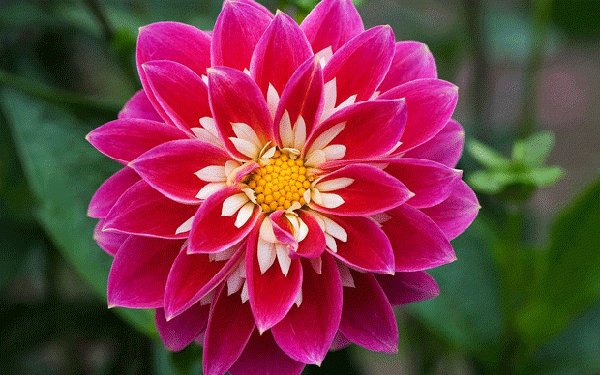

In [71]:
DisplayImage("../input/flowers/Dahlia.png")

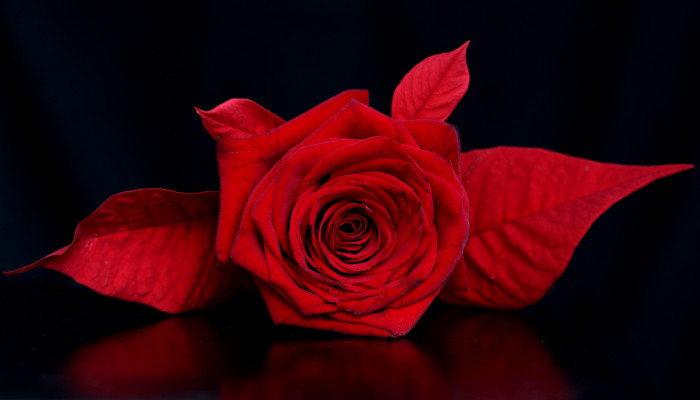

In [72]:
DisplayImage("../input/flowers/Rose.png")

In [ ]:
new_image1=imgtogry(img1)
new_image1.save("newimg1.png")
DisplayImage("newimg1.png")

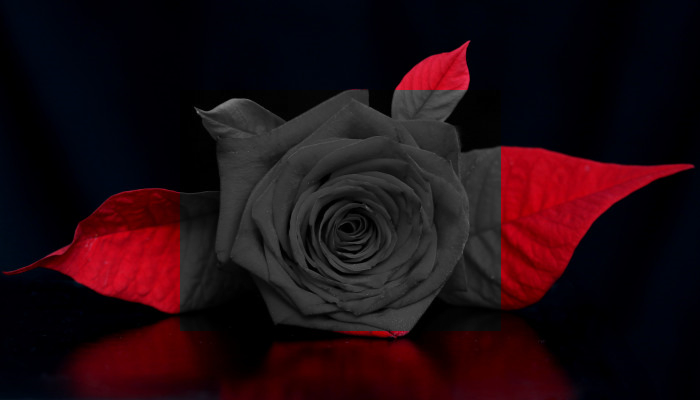

In [74]:
new_image2=imgtogry2(img,[90,180],[330,500])
new_image2.save("newimg2.png")
DisplayImage("newimg2.png")

In [ ]:
new_image3=imgtoneg(img1,[90,180],[330,500])
new_image3.save("newimg3.png")
DisplayImage("newimg3.png")

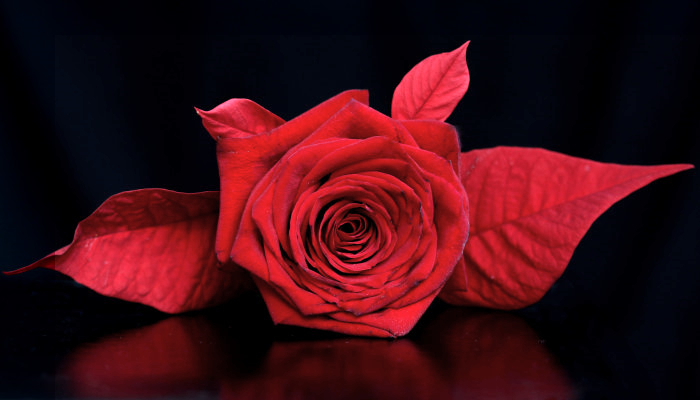

In [76]:
new_image4=brtimg(img,50,[35,55])
new_image4.save("newimg4.png")
DisplayImage("newimg4.png")

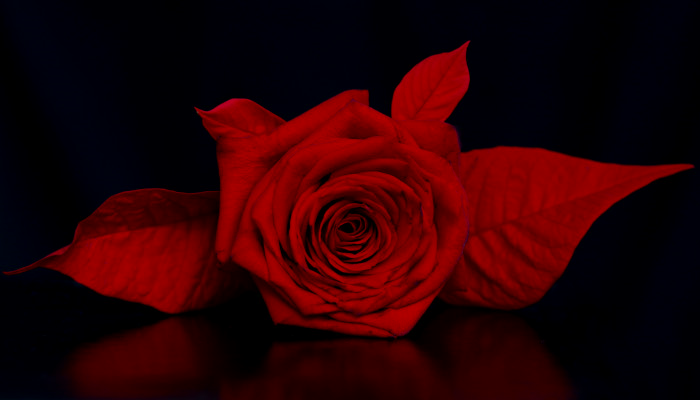

In [77]:
new_image5=drkimg(img,50)
new_image5.save("newimg5.png")
DisplayImage("newimg5.png")

In [ ]:
new_image6=fliphrz(img1)
new_image6.save("newimg6.png")
DisplayImage("newimg6.png")

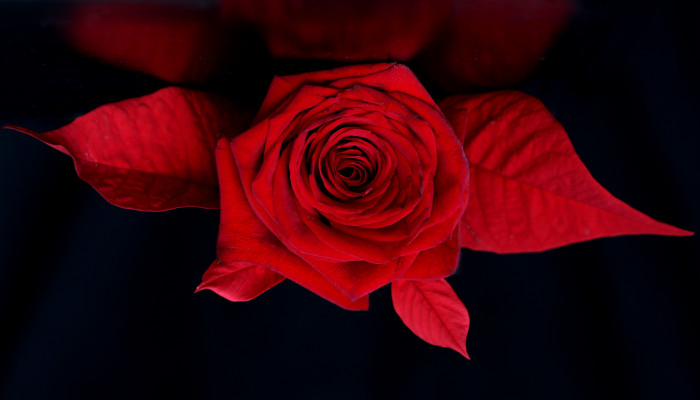

In [79]:
new_image7=flipvrt(img)
new_image7.save("newimg7.png")
DisplayImage("newimg7.png")

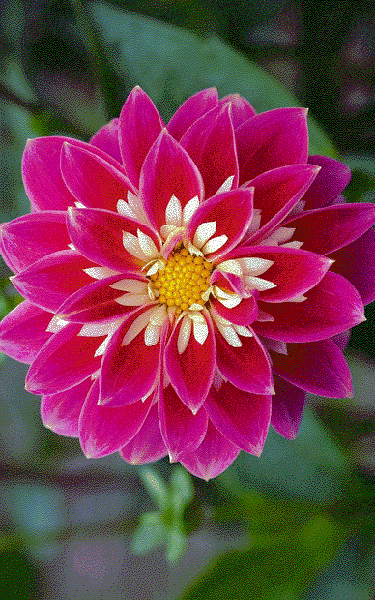

In [105]:
new_image8=rotate90(img1)
new_image8.save("newimg8.png")
DisplayImage("newimg8.png")

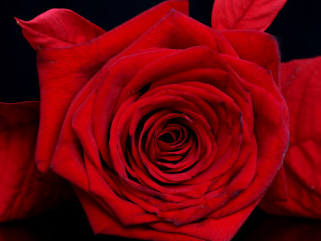

In [81]:
new_image9=cropimg(img,[90,180],[330,500])
new_image9.save("newimg9.png")
DisplayImage("newimg9.png")

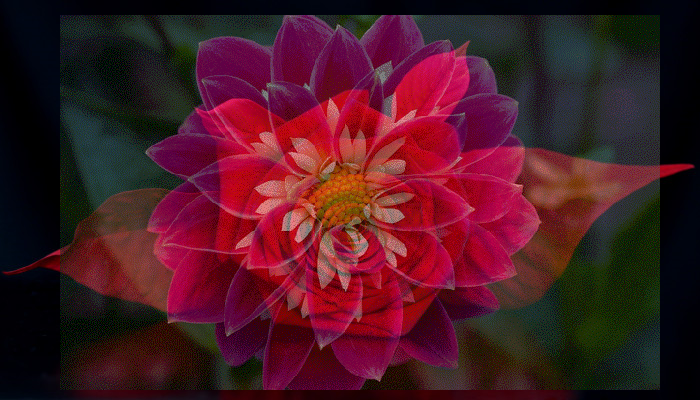

In [89]:
new_image10=imposeimg(img,img1,(15,60),"spr")
new_image10.save("newimg10.png")
DisplayImage("newimg10.png")

In [ ]:
new_image11=filterimg(img1,meanfltr)
new_image11.save("newimg11.png")
DisplayImage("newimg11.png")

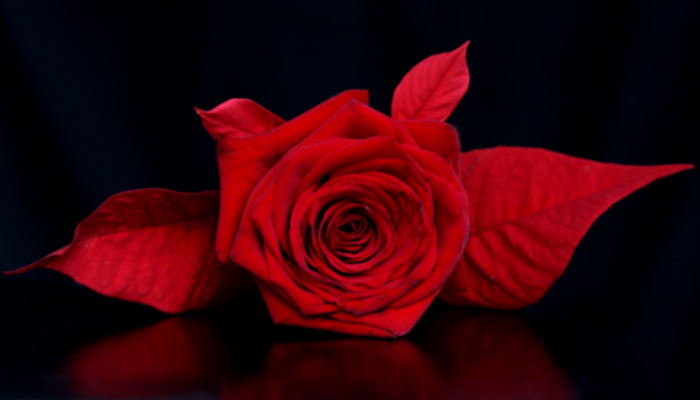

In [84]:
new_image12=filterimg(img,gaussianfltr)
new_image12.save("newimg12.png")
DisplayImage("newimg12.png")

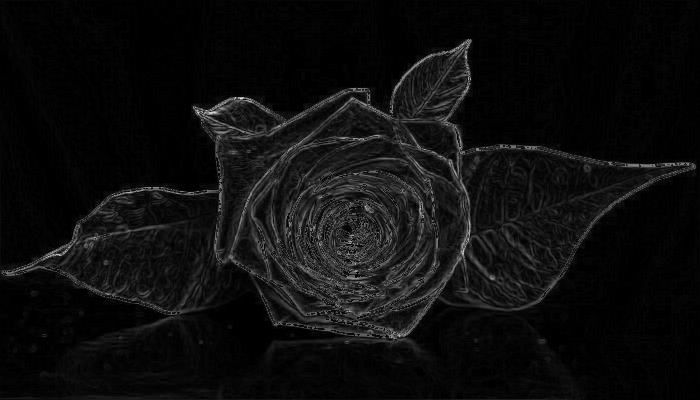

In [85]:
new_image13=imgtogry(sobelGxy(filterimg(img,sobelfltrGx),filterimg(img,sobelfltrGy)))
new_image13.save("newimg13.png")
DisplayImage("newimg13.png")

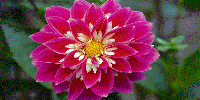

In [86]:
new_image14=resizeimg(img1,200,100)
new_image14.save("newimg14.png")
DisplayImage("newimg14.png")

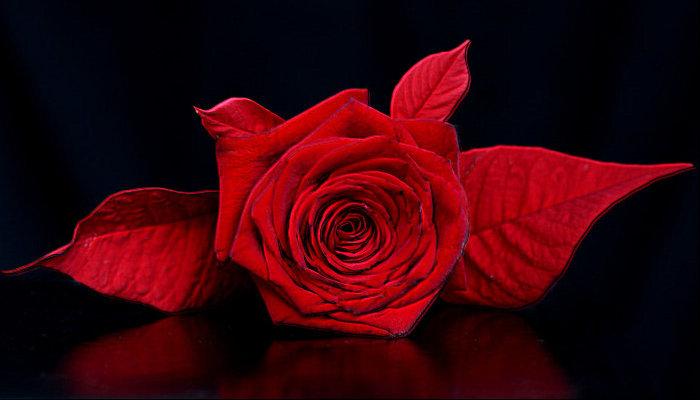

In [87]:
new_image15=filterimg(img,reflectfltr)
new_image15.save("newimg15.png")
DisplayImage("newimg15.png")

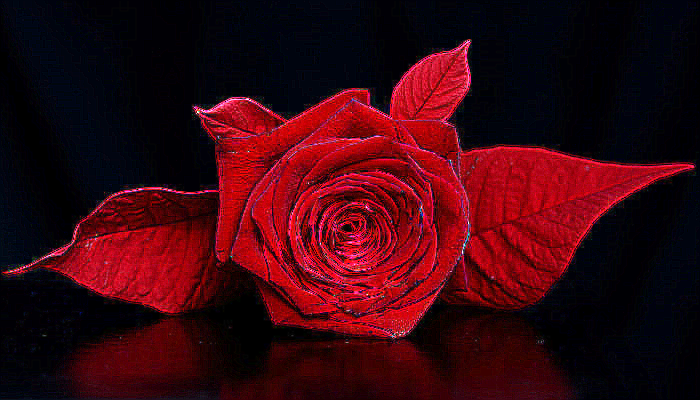

In [109]:
new_image16=filterimg(img,sharpenfltr)
new_image16.save("newimg16.png")
DisplayImage("newimg16.png")

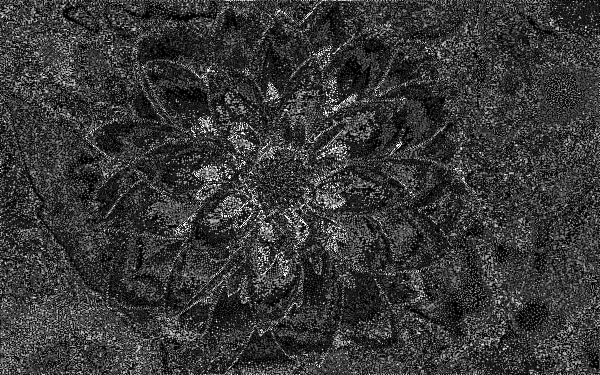

In [111]:
new_image17=filterimg(imgtogry(img),laplacianfltr)
new_image17.save("newimg17.png")
DisplayImage("newimg17.png")